In [1]:
import numpy as np
import matplotlib.pyplot as plt
import sys, os, glob
import xarray as xr

In [7]:
indir_hist = '/data/ysilvy/Density_binning/mme_hist/'
indir_rcp = '/data/ericglod/Density_binning/Prod_density_april15/mme_rcp85/'

DS1 = xr.open_dataset(indir_hist+'cmip5.multimodel_Nat_rcp85.historical.ensm.an.ocn.Omon.density_zon1D.nc',decode_times=False)
DS2 = xr.open_dataset(indir_rcp + 'cmip5.multimodel_Nat.rcp85.ensm.an.ocn.Omon.density_zon1D.nc',decode_times=False)


In [33]:
DS1['time'] =np.arange(1861,2006)
DS2['time'] =np.arange(2006,2101)

In [45]:
ptopsigma1 = DS1.ptopsigma.sel(basin=0,time=slice(1986,2005))
ptopsigma2 = DS2.ptopsigma.sel(basin=0,time=slice(2081,2100))

In [46]:
ptopsigma1 = ptopsigma1.mean(dim='time')
ptopsigma2 = ptopsigma2.mean(dim='time')

In [47]:
diff = ptopsigma2 - ptopsigma1

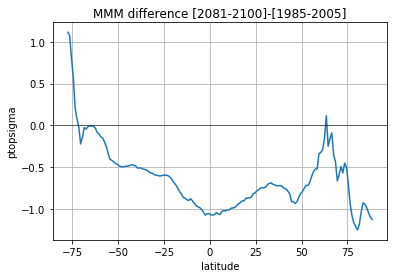

In [58]:
diff.plot()
plt.title('MMM difference [2081-2100]-[1985-2005]')
ax = plt.gca()
ax.axhline(y=0,color='k',lw=0.5)
plt.grid()

In [63]:
ptopdepth1 = DS1.ptopdepth.sel(basin=0,time=slice(1986,2005)).mean(dim='time')
ptopdepth2 = DS2.ptopdepth.sel(basin=0,time=slice(2081,2100)).mean(dim='time')

/home/ysilvy/.conda/envs/cdat81_py36/lib/python3.6/site-packages/xarray/core/nanops.py:159: RuntimeWarning: Mean of empty slice
  return np.nanmean(a, axis=axis, dtype=dtype)


In [64]:
diff_depth = ptopdepth2 - ptopdepth1

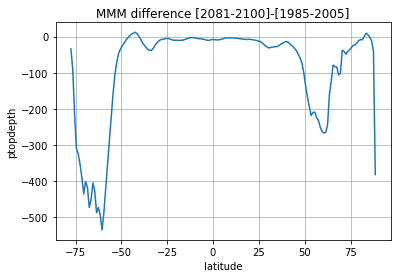

In [67]:
diff_depth.plot()
plt.title('MMM difference [2081-2100]-[1985-2005]')
plt.grid()

In [68]:
ptopdepth3 = DS1.ptopdepth.sel(basin=0,time=slice(1950,1970)).mean(dim='time')
ptopdepth4 = DS1.ptopdepth.sel(basin=0,time=slice(1986,2005)).mean(dim='time')
diff_depth_hist = ptopdepth4 - ptopdepth3

/home/ysilvy/.conda/envs/cdat81_py36/lib/python3.6/site-packages/xarray/core/nanops.py:159: RuntimeWarning: Mean of empty slice
  return np.nanmean(a, axis=axis, dtype=dtype)


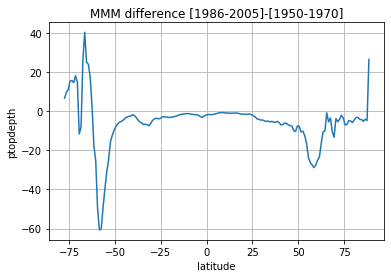

In [72]:
diff_depth_hist.plot()
plt.title('MMM difference [1986-2005]-[1950-1970]')
plt.grid()